In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
#Read in Ccsv file
track_audio_data = pd.read_csv("Resources/track_audio_data_FINAL_FOREAL.csv")
track_audio_data.head()

,Unnamed: 0,Billboard Chart Date,Year,Month,Title,Artist,Genre,Spotify Song ID,Spotify Popularity Rating,Number of Weeks In Top 100,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Explicitness,Duration (mins),Time Signature
0,0,2019-12-14,2019,12,Heartless,The Weeknd,R&B/Soul,57vxBYXtHMk6H1aD29V7PU,94.0,2,0.531,0.750,10.0,-5.831,0.0,0.1110,0.00632,0.000076,0.1170,0.198,169.954,1.0,3.334667,4.0
1,1,2019-12-07,2019,12,Circles,Post Malone,Hip-Hop/Rap,21jGcNKet2qwijlDFuPiPb,99.0,13,0.695,0.762,0.0,-3.497,1.0,0.0395,0.19200,0.002440,0.0863,0.553,120.042,0.0,3.588000,4.0
2,2,2019-11-30,2019,11,Circles,Post Malone,Hip-Hop/Rap,21jGcNKet2qwijlDFuPiPb,99.0,12,0.695,0.762,0.0,-3.497,1.0,0.0395,0.19200,0.002440,0.0863,0.553,120.042,0.0,3.588000,4.0
3,3,2019-11-23,2019,11,Someone You Loved,Lewis Capaldi,Alternative,7qEHsqek33rTcFNT9PFqLf,96.0,27,0.501,0.405,1.0,-5.679,1.0,0.0319,0.75100,0.000000,0.1050,0.446,109.891,0.0,3.036017,4.0
4,4,2019-11-16,2019,11,Someone You Loved,Lewis Capaldi,Alternative,7qEHsqek33rTcFNT9PFqLf,96.0,26,0.501,0.405,1.0,-5.679,1.0,0.0319,0.75100,0.000000,0.1050,0.446,109.891,0.0,3.036017,4.0


In [3]:
#Drop Unnamed Column
track_audio_data = track_audio_data.drop(columns=["Unnamed: 0"])
track_audio_data.head(20)

,Billboard Chart Date,Year,Month,Title,Artist,Genre,Spotify Song ID,Spotify Popularity Rating,Number of Weeks In Top 100,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Explicitness,Duration (mins),Time Signature
0,2019-12-14,2019,12,Heartless,The Weeknd,R&B/Soul,57vxBYXtHMk6H1aD29V7PU,94.0,2,0.531,0.750,10.0,-5.831,0.0,0.1110,0.00632,0.000076,0.1170,0.1980,169.954,1.0,3.334667,4.0
1,2019-12-07,2019,12,Circles,Post Malone,Hip-Hop/Rap,21jGcNKet2qwijlDFuPiPb,99.0,13,0.695,0.762,0.0,-3.497,1.0,0.0395,0.19200,0.002440,0.0863,0.5530,120.042,0.0,3.588000,4.0
2,2019-11-30,2019,11,Circles,Post Malone,Hip-Hop/Rap,21jGcNKet2qwijlDFuPiPb,99.0,12,0.695,0.762,0.0,-3.497,1.0,0.0395,0.19200,0.002440,0.0863,0.5530,120.042,0.0,3.588000,4.0
3,2019-11-23,2019,11,Someone You Loved,Lewis Capaldi,Alternative,7qEHsqek33rTcFNT9PFqLf,96.0,27,0.501,0.405,1.0,-5.679,1.0,0.0319,0.75100,0.000000,0.1050,0.4460,109.891,0.0,3.036017,4.0
4,2019-11-16,2019,11,Someone You Loved,Lewis Capaldi,Alternative,7qEHsqek33rTcFNT9PFqLf,96.0,26,0.501,0.405,1.0,-5.679,1.0,0.0319,0.75100,0.000000,0.1050,0.4460,109.891,0.0,3.036017,4.0
5,2019-11-09,2019,11,Lose You To Love Me,Selena Gomez,Pop,1HfMVBKM75vxSfsQ5VefZ5,98.0,2,0.505,0.340,4.0,-9.005,1.0,0.0438,0.57600,0.000000,0.2100,0.0916,101.993,0.0,3.440983,4.0
6,2019-11-02,2019,11,Someone You Loved,Lewis Capaldi,Alternative,7qEHsqek33rTcFNT9PFqLf,96.0,24,0.501,0.405,1.0,-5.679,1.0,0.0319,0.75100,0.000000,0.1050,0.4460,109.891,0.0,3.036017,4.0
7,2019-10-26,2019,10,Truth Hurts,Lizzo,Pop,5qmq61DAAOUaW8AUo8xKhh,91.0,24,0.715,0.624,4.0,-3.046,0.0,0.1140,0.11000,0.000000,0.1230,0.4120,158.087,1.0,2.888750,4.0
8,2019-10-19,2019,10,HIGHEST IN THE ROOM,Travis Scott,Hip-Hop/Rap,3eekarcy7kvN4yt5ZFzltW,97.0,1,0.598,0.427,7.0,-8.764,0.0,0.0317,0.05460,0.000006,0.2100,0.0605,76.469,1.0,2.928683,4.0
9,2019-10-12,2019,10,Truth Hurts,Lizzo,Pop,5qmq61DAAOUaW8AUo8xKhh,91.0,22,0.715,0.624,4.0,-3.046,0.0,0.1140,0.11000,0.000000,0.1230,0.4120,158.087,1.0,2.888750,4.0


In [68]:
#Extract Month and add to column of its own
track_audio_data["Month"] = pd.DatetimeIndex(track_audio_data["Billboard Chart Date"]).month
track_audio_data.head()

,Billboard Chart Date,Title,Artist,Genre,Year,Spotify Song ID,Spotify Popularity Rating,Number of Weeks In Top 100,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Explicitness,Duration (mins),Time Signature,Month
0,2019-12-14,Heartless,The Weeknd,R&B/Soul,2019,57vxBYXtHMk6H1aD29V7PU,94.0,2,0.531,0.750,10.0,-5.831,0.0,0.1110,0.00632,0.000076,0.1170,0.198,169.954,1.0,3.334667,4.0,12
1,2019-12-07,Circles,Post Malone,Hip-Hop/Rap,2019,21jGcNKet2qwijlDFuPiPb,99.0,13,0.695,0.762,0.0,-3.497,1.0,0.0395,0.19200,0.002440,0.0863,0.553,120.042,0.0,3.588000,4.0,12
2,2019-11-30,Circles,Post Malone,Hip-Hop/Rap,2019,21jGcNKet2qwijlDFuPiPb,99.0,12,0.695,0.762,0.0,-3.497,1.0,0.0395,0.19200,0.002440,0.0863,0.553,120.042,0.0,3.588000,4.0,11
3,2019-11-23,Someone You Loved,Lewis Capaldi,Alternative,2019,7qEHsqek33rTcFNT9PFqLf,96.0,27,0.501,0.405,1.0,-5.679,1.0,0.0319,0.75100,0.000000,0.1050,0.446,109.891,0.0,3.036017,4.0,11
4,2019-11-16,Someone You Loved,Lewis Capaldi,Alternative,2019,7qEHsqek33rTcFNT9PFqLf,96.0,26,0.501,0.405,1.0,-5.679,1.0,0.0319,0.75100,0.000000,0.1050,0.446,109.891,0.0,3.036017,4.0,11


In [69]:
track_audio_data = track_audio_data[["Billboard Chart Date", "Year", "Month", "Title", "Artist",
                                     "Genre", "Spotify Song ID", "Spotify Popularity Rating", 
                                     "Number of Weeks In Top 100", "Danceability", "Energy",
                                     "Key", "Loudness", "Mode", "Speechiness", "Acousticness",
                                     "Instrumentalness", "Liveness", "Valence", "Tempo", 
                                     "Explicitness", "Duration (mins)", "Time Signature"]]
track_audio_data.head()

,Billboard Chart Date,Year,Month,Title,Artist,Genre,Spotify Song ID,Spotify Popularity Rating,Number of Weeks In Top 100,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Explicitness,Duration (mins),Time Signature
0,2019-12-14,2019,12,Heartless,The Weeknd,R&B/Soul,57vxBYXtHMk6H1aD29V7PU,94.0,2,0.531,0.750,10.0,-5.831,0.0,0.1110,0.00632,0.000076,0.1170,0.198,169.954,1.0,3.334667,4.0
1,2019-12-07,2019,12,Circles,Post Malone,Hip-Hop/Rap,21jGcNKet2qwijlDFuPiPb,99.0,13,0.695,0.762,0.0,-3.497,1.0,0.0395,0.19200,0.002440,0.0863,0.553,120.042,0.0,3.588000,4.0
2,2019-11-30,2019,11,Circles,Post Malone,Hip-Hop/Rap,21jGcNKet2qwijlDFuPiPb,99.0,12,0.695,0.762,0.0,-3.497,1.0,0.0395,0.19200,0.002440,0.0863,0.553,120.042,0.0,3.588000,4.0
3,2019-11-23,2019,11,Someone You Loved,Lewis Capaldi,Alternative,7qEHsqek33rTcFNT9PFqLf,96.0,27,0.501,0.405,1.0,-5.679,1.0,0.0319,0.75100,0.000000,0.1050,0.446,109.891,0.0,3.036017,4.0
4,2019-11-16,2019,11,Someone You Loved,Lewis Capaldi,Alternative,7qEHsqek33rTcFNT9PFqLf,96.0,26,0.501,0.405,1.0,-5.679,1.0,0.0319,0.75100,0.000000,0.1050,0.446,109.891,0.0,3.036017,4.0


In [70]:
most_weeks = track_audio_data["Title"].value_counts()
print(most_weeks)

We Are Young                                     48
We Found Love                                    38
Royals                                           29
Happy                                            25
Blurred Lines                                    24
Stronger (What Doesn't Kill You)                 23
Dark Horse                                       20
E.T.                                             20
The Monster                                      20
Old Town Road                                    19
Party Rock Anthem                                18
Rolling In The Deep                              17
Despacito                                        16
Timber                                           15
Someone Like You                                 15
I Gotta Feeling                                  14
We Belong Together                               14
Set Fire To The Rain                             14
Uptown Funk!                                     14
Sexy And I K

In [71]:
most_common_genre = track_audio_data["Genre"].value_counts()
print(most_common_genre)

Pop                  666
Hip-Hop/Rap          265
R&B/Soul             133
Dance                 68
Alternative           45
Country               24
Rock                  23
Soundtrack            19
Pop Latino            19
Hip-Hop               19
Rap                   13
Singer/Songwriter     12
Electronic             9
Pop/Rock               6
Hardcore Rap           2
Reggae                 1
Name: Genre, dtype: int64


In [92]:
for index, row in track_audio_data.iterrows():
    if (row["Genre"]=="Hip-Hop") or (row["Explicitness"]=="Rap"):
        track_audio_data.loc[index, "Genre"]= "Hip-Hop/Rap"
#    elif (row["Explicitness"]=="notExplicit") or (row["Explicitness"]=="NaN"):
#        track_audio_data.loc[index, "Explicitness"]= 0.0

track_audio_data.head()

,Billboard Chart Date,Year,Month,Title,Artist,Genre,Spotify Song ID,Spotify Popularity Rating,Number of Weeks In Top 100,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Explicitness,Duration (mins),Time Signature
0,2019-12-14,2019,12,Heartless,The Weeknd,R&B/Soul,57vxBYXtHMk6H1aD29V7PU,94.0,2,0.531,0.750,10.0,-5.831,0.0,0.1110,0.00632,0.000076,0.1170,0.198,169.954,1.0,3.334667,4.0
1,2019-12-07,2019,12,Circles,Post Malone,Hip-Hop/Rap,21jGcNKet2qwijlDFuPiPb,99.0,13,0.695,0.762,0.0,-3.497,1.0,0.0395,0.19200,0.002440,0.0863,0.553,120.042,0.0,3.588000,4.0
2,2019-11-30,2019,11,Circles,Post Malone,Hip-Hop/Rap,21jGcNKet2qwijlDFuPiPb,99.0,12,0.695,0.762,0.0,-3.497,1.0,0.0395,0.19200,0.002440,0.0863,0.553,120.042,0.0,3.588000,4.0
3,2019-11-23,2019,11,Someone You Loved,Lewis Capaldi,Alternative,7qEHsqek33rTcFNT9PFqLf,96.0,27,0.501,0.405,1.0,-5.679,1.0,0.0319,0.75100,0.000000,0.1050,0.446,109.891,0.0,3.036017,4.0
4,2019-11-16,2019,11,Someone You Loved,Lewis Capaldi,Alternative,7qEHsqek33rTcFNT9PFqLf,96.0,26,0.501,0.405,1.0,-5.679,1.0,0.0319,0.75100,0.000000,0.1050,0.446,109.891,0.0,3.036017,4.0


In [ ]:
#track_audio_data["Explicitness"] = track_audio_data["Explicitness"].astype(float)
#track_audio_data

In [93]:
#Save updated dataframe to CSV
track_audio_data.to_csv("Resources/track_audio_data_FINAL_FOREAL.csv")

In [72]:
pop_audio_data = track_audio_data.loc[track_audio_data["Genre"]=="Pop"]
pop_audio_data

,Billboard Chart Date,Year,Month,Title,Artist,Genre,Spotify Song ID,Spotify Popularity Rating,Number of Weeks In Top 100,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Explicitness,Duration (mins),Time Signature
5,2019-11-09,2019,11,Lose You To Love Me,Selena Gomez,Pop,1HfMVBKM75vxSfsQ5VefZ5,98.0,2,0.505,0.340,4.0,-9.005,1.0,0.0438,0.576,0.0,0.210,0.0916,101.993,0.0,3.440983,4.0
7,2019-10-26,2019,10,Truth Hurts,Lizzo,Pop,5qmq61DAAOUaW8AUo8xKhh,91.0,24,0.715,0.624,4.0,-3.046,0.0,0.1140,0.110,0.0,0.123,0.4120,158.087,1.0,2.888750,4.0
9,2019-10-12,2019,10,Truth Hurts,Lizzo,Pop,5qmq61DAAOUaW8AUo8xKhh,91.0,22,0.715,0.624,4.0,-3.046,0.0,0.1140,0.110,0.0,0.123,0.4120,158.087,1.0,2.888750,4.0
10,2019-10-05,2019,10,Truth Hurts,Lizzo,Pop,5qmq61DAAOUaW8AUo8xKhh,91.0,21,0.715,0.624,4.0,-3.046,0.0,0.1140,0.110,0.0,0.123,0.4120,158.087,1.0,2.888750,4.0
11,2019-09-28,2019,9,Truth Hurts,Lizzo,Pop,5qmq61DAAOUaW8AUo8xKhh,91.0,20,0.715,0.624,4.0,-3.046,0.0,0.1140,0.110,0.0,0.123,0.4120,158.087,1.0,2.888750,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,2000-07-15,2000,7,Everything You Want,Vertical Horizon,Pop,4vXM6nJT5IgfQa9xKI9Da7,9.0,26,0.477,0.551,2.0,-11.344,1.0,0.0914,0.710,0.0,0.509,0.9450,131.938,0.0,2.130383,4.0
1324,2000-02-26,2000,2,I Knew I Loved You,Savage Garden,Pop,0JgQ1tl7q1AMbT8YaardMk,16.0,19,0.662,0.529,2.0,-8.104,1.0,0.0261,0.087,0.0,0.067,0.4290,84.410,0.0,3.530000,4.0
1326,2000-02-12,2000,2,I Knew I Loved You,Savage Garden,Pop,0JgQ1tl7q1AMbT8YaardMk,16.0,17,0.662,0.529,2.0,-8.104,1.0,0.0261,0.087,0.0,0.067,0.4290,84.410,0.0,3.530000,4.0
1327,2000-02-05,2000,2,I Knew I Loved You,Savage Garden,Pop,0JgQ1tl7q1AMbT8YaardMk,16.0,16,0.662,0.529,2.0,-8.104,1.0,0.0261,0.087,0.0,0.067,0.4290,84.410,0.0,3.530000,4.0


In [94]:
hiphoprap_audio_data = track_audio_data.loc[track_audio_data["Genre"]=="Hip-Hop/Rap"]
hiphoprap_audio_data

,Billboard Chart Date,Year,Month,Title,Artist,Genre,Spotify Song ID,Spotify Popularity Rating,Number of Weeks In Top 100,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Explicitness,Duration (mins),Time Signature
1,2019-12-07,2019,12,Circles,Post Malone,Hip-Hop/Rap,21jGcNKet2qwijlDFuPiPb,99.0,13,0.695,0.762,0.0,-3.497,1.0,0.0395,0.192000,0.002440,0.0863,0.5530,120.042,0.0,3.588000,4.0
2,2019-11-30,2019,11,Circles,Post Malone,Hip-Hop/Rap,21jGcNKet2qwijlDFuPiPb,99.0,12,0.695,0.762,0.0,-3.497,1.0,0.0395,0.192000,0.002440,0.0863,0.5530,120.042,0.0,3.588000,4.0
8,2019-10-19,2019,10,HIGHEST IN THE ROOM,Travis Scott,Hip-Hop/Rap,3eekarcy7kvN4yt5ZFzltW,97.0,1,0.598,0.427,7.0,-8.764,0.0,0.0317,0.054600,0.000006,0.2100,0.0605,76.469,1.0,2.928683,4.0
47,2019-01-19,2019,1,Sunflower (Spider-Man: Into The Spider-Verse),Post Malone & Swae Lee,Hip-Hop/Rap,0RiRZpuVRbi7oqRdSMwhQY,88.0,12,0.755,0.522,2.0,-4.368,1.0,0.0575,0.533000,0.000000,0.0685,0.9250,89.960,0.0,2.626000,4.0
53,2018-12-08,2018,12,Sicko Mode,Travis Scott,Hip-Hop/Rap,2xLMifQCjDGFmkHkpNLD9h,89.0,17,0.834,0.730,8.0,-3.714,1.0,0.2220,0.005130,0.000000,0.1240,0.4460,155.008,1.0,5.213667,4.0
64,2018-09-22,2018,9,In My Feelings,Drake,Hip-Hop/Rap,2G7V7zsVDxg1yRsu7Ew9RJ,84.0,11,0.835,0.626,1.0,-5.833,1.0,0.1250,0.058900,0.000060,0.3960,0.3500,91.030,1.0,3.632083,4.0
65,2018-09-15,2018,9,In My Feelings,Drake,Hip-Hop/Rap,2G7V7zsVDxg1yRsu7Ew9RJ,84.0,10,0.835,0.626,1.0,-5.833,1.0,0.1250,0.058900,0.000060,0.3960,0.3500,91.030,1.0,3.632083,4.0
66,2018-09-08,2018,9,In My Feelings,Drake,Hip-Hop/Rap,2G7V7zsVDxg1yRsu7Ew9RJ,84.0,9,0.835,0.626,1.0,-5.833,1.0,0.1250,0.058900,0.000060,0.3960,0.3500,91.030,1.0,3.632083,4.0
67,2018-09-01,2018,9,In My Feelings,Drake,Hip-Hop/Rap,2G7V7zsVDxg1yRsu7Ew9RJ,84.0,8,0.835,0.626,1.0,-5.833,1.0,0.1250,0.058900,0.000060,0.3960,0.3500,91.030,1.0,3.632083,4.0
68,2018-08-25,2018,8,In My Feelings,Drake,Hip-Hop/Rap,2G7V7zsVDxg1yRsu7Ew9RJ,84.0,7,0.835,0.626,1.0,-5.833,1.0,0.1250,0.058900,0.000060,0.3960,0.3500,91.030,1.0,3.632083,4.0


In [88]:
mean_pop_audio_data = pop_audio_data.groupby(["Year", "Month"]).mean().reset_index().reset_index()
mean_pop_audio_data

,index,Year,Month,Spotify Popularity Rating,Number of Weeks In Top 100,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Explicitness,Duration (mins),Time Signature
0,0,2000,1,16.000000,15.000000,0.662000,0.529000,2.000000,-8.104000,1.000000,0.026100,0.087000,0.000000e+00,0.067000,0.429000,84.410000,0.00,3.530000,4.0
1,1,2000,2,16.000000,17.333333,0.662000,0.529000,2.000000,-8.104000,1.000000,0.026100,0.087000,0.000000e+00,0.067000,0.429000,84.410000,0.00,3.530000,4.0
2,2,2000,7,43.666667,17.333333,0.543667,0.751333,2.666667,-7.610000,0.333333,0.067000,0.263700,1.706667e-06,0.307067,0.793333,130.825667,0.00,3.202128,4.0
3,3,2000,8,45.500000,12.500000,0.678000,0.884000,2.500000,-4.119000,0.000000,0.059950,0.107850,4.030635e-03,0.145600,0.718000,132.227500,0.00,4.076892,4.0
4,4,2000,9,55.200000,9.200000,0.739200,0.488800,8.600000,-10.532600,0.000000,0.058740,0.070329,4.760240e-01,0.143540,0.542400,117.793200,0.00,3.784667,4.0
5,5,2000,10,76.000000,9.000000,0.752000,0.218000,11.000000,-15.177000,0.000000,0.065300,0.000548,7.880000e-01,0.069900,0.552000,130.066000,0.00,3.010000,4.0
6,6,2001,4,59.000000,6.000000,0.753000,0.933000,2.000000,-2.975000,1.000000,0.072600,0.016900,1.150000e-01,0.131000,0.724000,113.527000,0.00,5.498883,3.0
7,7,2001,5,59.000000,9.500000,0.753000,0.933000,2.000000,-2.975000,1.000000,0.072600,0.016900,1.150000e-01,0.131000,0.724000,113.527000,0.00,5.498883,3.0
8,8,2001,8,65.000000,9.500000,0.835000,0.833000,1.000000,-4.364000,0.000000,0.284000,0.002470,0.000000e+00,0.171000,0.586000,103.358000,0.00,3.462217,4.0
9,9,2002,10,23.000000,3.500000,0.347000,0.460000,8.000000,-7.290000,1.000000,0.031500,0.499000,3.710000e-05,0.116000,0.134000,144.814000,0.00,3.804883,4.0


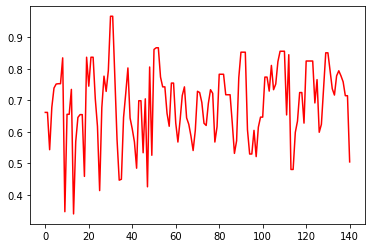

In [90]:
#Graph average danceability among pop songs for the last 20 years
x_axis = mean_pop_audio_data["index"]
y_axis = mean_pop_audio_data["Danceability"]

plt.plot(x_axis, y_axis, color="red")
plt.show()

In [74]:
mean_audio_data = track_audio_data.groupby(["Year","Month"]).mean()
mean_audio_data

Spotify Popularity Rating  Number of Weeks In Top 100  Danceability    Energy        Key   Loudness      Mode  Speechiness  Acousticness  Instrumentalness  Liveness   Valence       Tempo  Explicitness  Duration (mins)  Time Signature
Year Month                                                                                                                                                                                                                                           
2000 1                      22.666667                   20.666667      0.668667  0.577000   4.000000  -8.338667  0.333333     0.031167      0.098333      3.086667e-03  0.041733  0.555667   87.302667      0.000000         4.382889        4.000000
     2                      23.250000                   15.750000      0.648500  0.586750   2.500000  -7.540750  0.750000     0.080075      0.068475      0.000000e+00  0.133250  0.413250  105.360250      0.000000         3.696000        4.000000
     3                      41.500000                   22.500000      0.634500  0.664000   3.500000  -5.091500  0.500000     0.078400      0.315000      0.000000e+00  0.167000  0.530500  104.470000      0.000000         4.330225        4.000000
     4                      48.200000                   11.400000      0.575200  0.418200   7.400000  -9.105000  0.800000     0.048720      0.713400      1.440000e-03  0.391600  0.436800   78.118400      0.000000         3.889517        4.000000
     5                      48.000000                   14.500000      0.561000  0.365000   8.000000 -10.431000  1.000000     0.028400      0.814000      1.800000e-03  0.454000  0.375000   80.428000      0.000000         3.745117        4.000000
     6                      44.000000                   15.500000      0.525750  0.606000   6.500000  -8.076000  1.000000     0.032000      0.443450      3.590470e-02  0.534250  0.525750  116.307000      0.000000         4.221179        4.000000
     7                      49.000000                   16.200000      0.532200  0.814000   4.800000  -6.418800  0.600000     0.054920      0.164540      8.544000e-06  0.349040  0.730800  138.507800      0.000000         3.605277        4.000000
     8                      22.750000                   10.500000      0.562500  0.706000   4.750000  -8.263500  0.500000     0.048825      0.310925      4.395153e-01  0.174300  0.444000  101.064250      0.500000         4.288888        4.000000
     9                      55.200000                    9.200000      0.739200  0.488800   8.600000 -10.532600  0.000000     0.058740      0.070329      4.760240e-01  0.143540  0.542400  117.793200      0.000000         3.784667        4.000000
     10                     76.000000                    9.000000      0.752000  0.218000  11.000000 -15.177000  0.000000     0.065300      0.000548      7.880000e-01  0.069900  0.552000  130.066000      0.000000         3.010000        4.000000
2001 2                      14.000000                   13.000000      0.739250  0.893000   3.750000  -4.728000  0.500000     0.095100      0.067600      1.297500e-01  0.112550  0.742750  104.112500      0.500000         3.051613        4.000000
     3                      18.000000                   11.200000      0.507400  0.718400   8.800000  -7.798200  0.200000     0.038380      0.105133      4.824000e-01  0.151520  0.491200  113.249400      0.000000         3.423027        4.000000
     4                      54.250000                    8.000000      0.664750  0.899750   4.000000  -4.061500  0.750000     0.070450      0.012691      3.000000e-01  0.110150  0.681250  115.652250      0.000000         5.195942        3.250000
     5                      59.000000                    9.500000      0.753000  0.933000   2.000000  -2.975000  1.000000     0.072600      0.016900      1.150000e-01  0.131000  0.724000  113.527000      0.000000         5.498883        3.000000
     6                      64.000000                   10.000000      0.756

In [ ]:
#mean_audio_data["Year"] = mean_audio_data["Year"].astype(str)
#mean_audio_data["Year"]

In [ ]:
years = mean_audio_data["Year"]
danceability = mean_audio_data["Danceability"]
energy = mean_audio_data["Energy"]
key = mean_audio_data["Key"]
loudness = mean_audio_data["Loudness"]
mode = mean_audio_data["Mode"]
speechiness = mean_audio_data["Speechiness"]
acousticness = mean_audio_data["Acousticness"]
instrumentallness = mean_audio_data["Instrumentalness"]
liveness = mean_audio_data["Liveness"]
valence = mean_audio_data["Valence"]
tempo = mean_audio_data["Tempo"]
explicitness = mean_audio_data["Explicitness"]
duration = mean_audio_data["Duration (mins)"]

In [ ]:
plt.plot(years, danceability, color="black")
tick_locations = [value for value in years]
plt.xticks(tick_locations, rotation=45)
plt.xlabel("Years", fontsize=12)
plt.ylabel("Avg Danceability Rating", fontsize=12)
plt.title("Avg Danceability Rating Over the Last 20 Years", fontsize=14)
plt.xlim(1999,2020)
plt.grid(alpha=.5)
plt.show()

In [ ]:
plt.scatter(years, key, marker="o", facecolors="fuchsia", edgecolors="black")
plt.xlabel("Years", fontsize=12)
plt.ylabel("Avg Energy Rating", fontsize=12)
plt.title("Avg Energy Rating Over the Last 20 Years", fontsize=14)
plt.xlim(1999,2020)
plt.xticks(rotation=45)
plt.grid(alpha=.5)
plt.show()

In [ ]:
plt.scatter(years, energy, marker="o", facecolors="fuchsia", edgecolors="black")
plt.xlabel("Years", fontsize=12)
plt.ylabel("Avg Energy Rating", fontsize=12)
plt.title("Avg Energy Rating Over the Last 20 Years", fontsize=14)
plt.xlim(1999,2020)
plt.xticks(rotation=45)
plt.grid(alpha=.5)
plt.show()

In [ ]:
x_axis = np.arange(0,20,1)
y_axis = df_yg_only["Billboard Chart Date"]